In [1]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'cmsy10',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmex10',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmr10',
 'STIXNonUnicode',
 'cmb10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXGeneral',
 'Liberation Serif',
 'NanumGothic',
 'NanumBarunGothic',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'NanumSquare',
 'NanumSquareRound',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'NanumGothic',
 'NanumSquareRound',
 'Liberation Mono',
 'Liberation Sans',
 'Humor Sans',
 'Liberation Sans Narrow',
 'Libe

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


#matplotlib font 설정
import matplotlib .pyplot as plt
plt.rc('font', family='NanumGothic')

fontpath = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath, size=14).get_name()
print(font)
plt.rc("font", family=font)
# fm._rebuild()
mpl.rcParams["axes.unicode_minus"]

import seaborn as sns
plt.style.use("fivethirtyeight")

from plotnine import *

import folium

import warnings
warnings.filterwarnings("ignore")

NanumBarunGothic


# 데이터 불러오기 및 확인

In [5]:
df = pd.read_excel('/content/drive/MyDrive/공모전2/복지로_정책(통합).xlsx')

In [6]:
df

,분야,제공유형,복지서비스,지역
0,교육,현금,출산양육 지원금 지원,서울
1,서민금융,현금,다자녀가정 출산특별장려금 및 입학축하금 지원 사업,서울
2,서민금융,현금,서울특별시 도봉구 장애인가정 출산지원금 지원,서울
3,서민금융,현금,출산축하금 및 출산축하용품 지원사업,서울
4,신체건강,현금,산후조리비용 지원,서울
...,...,...,...,...
534,건강,현금,산모신생아 건강관리 지원사업(본인부담금 지원),전라남도
535,생활지원,프로그램,저소득 한부모가족 자립지원,전라남도
536,생활지원,바우처,가정위탁아동 등 자립지원,전라남도
537,문화여가,현금,아동복지 서비스 증진,전라남도


In [7]:
df[df['제공유형']=='지역화'] = '지역화폐'

In [8]:
df.지역.value_counts()

경기      92
전라남도    53
강원도     49
경남      49
전라북도    40
서울      36
경북      35
부산      34
충청북도    33
충청남도    29
인천      27
울산      19
대구      15
대전       9
제주       7
세종       6
광주       5
지역화폐     1
Name: 지역, dtype: int64

In [9]:
df[df.지역=='광주']

,분야,제공유형,복지서비스,지역
112,교육,바우처,어린이집차액보육료지원,광주
113,생활지원,현물,장애아동지원,광주
114,서민금융,현금,출산장려금 지원,광주
115,서민금융,현금,희망아이출생 산모산후관리비지원,광주
116,생활지원,현금,사회보장적 수혜금,광주


In [10]:
df['지역'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '제주', '경남', '경북',
       '경기', '강원도', '충청북도', '충청남도', '지역화폐', '전라북도', '전라남도'], dtype=object)

In [11]:
df.loc[df.지역.str.contains('충청북'), '지역'] = '충북'
df.loc[df.지역.str.contains('충청남'), '지역'] = '충남'
df.loc[df.지역.str.contains('전라북'), '지역'] = '전북'
df.loc[df.지역.str.contains('전라남'), '지역'] = '전남'
df.loc[df.지역.str.contains('강원도'), '지역'] = '강원'

In [12]:
df['지역'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '제주', '경남', '경북',
       '경기', '강원', '충북', '충남', '지역화폐', '전북', '전남'], dtype=object)

In [13]:
df[df.제공유형=='돌봄'] = '보육'

In [14]:
df.제공유형.unique()

array(['현금', '프로그램', '지역화폐', '바우처', '현물', '교육', '자원봉사', '서민금융'],
      dtype=object)

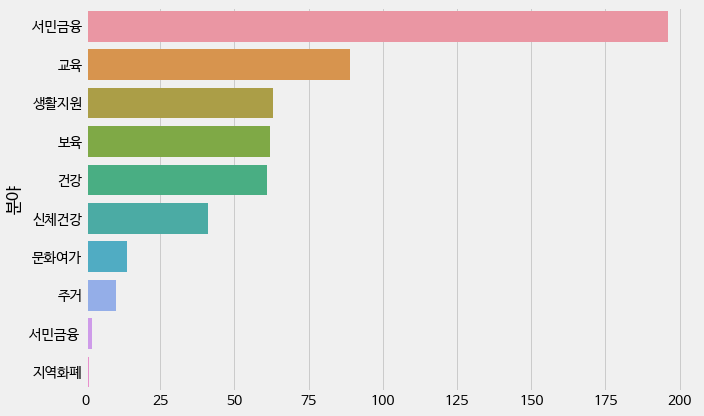

In [15]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use("fivethirtyeight")
ax = sns.countplot(y='분야', data=df, order = df['분야'].value_counts().index)
plt.xlabel('')
# plt.ylabel('')
plt.tight_layout()

In [16]:
df['분야'].value_counts()

서민금융     196
교육        89
생활지원      63
보육        62
건강        61
신체건강      41
문화여가      14
주거        10
서민금융       2
지역화폐       1
Name: 분야, dtype: int64

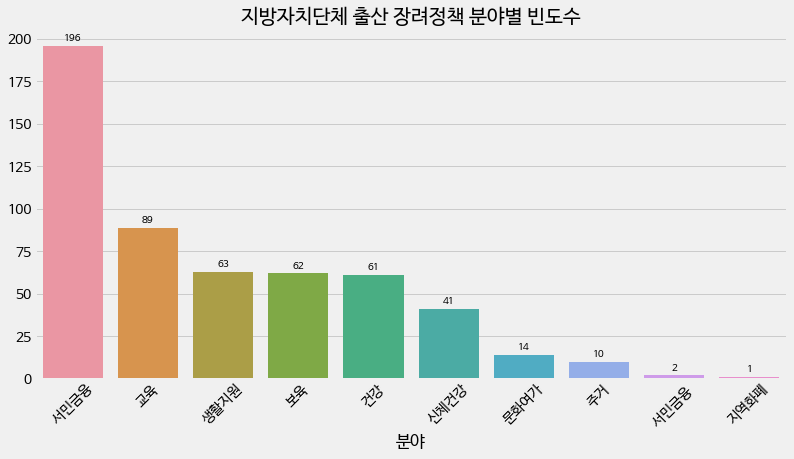

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))
# 1
# plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
ax = sns.countplot(x='분야', data=df, order = df['분야'].value_counts().index)
plt.title('지방자치단체 출산 장려정책 분야별 빈도수', fontsize=20)
plt.ylabel('')
for p in ax.patches:  # countplot 위에 수치 나타내기
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, height, ha='center', size=10)

# # 2
# plt.style.use("fivethirtyeight")
# plt.subplot(1, 2, 2)
# ax = df['분야'].value_counts().plot.pie(autopct='%.2f%%', startangle=90)
# ax.set_title(label='출산 장려정책 비중', fontsize=20)

plt.show()

In [18]:
seoul = df[df.지역=='서울']
seoul.분야.value_counts()

서민금융    13
생활지원     7
보육       6
교육       4
신체건강     3
문화여가     2
주거       1
Name: 분야, dtype: int64

In [19]:
seoul.분야.unique()
seoul_lb = ['교육', '서민금융', '신체건강', '생활지원', '보육', '주거', '문화여가']

## 출산율 TOP3 + 1

세종/전남/강원 + 광주(출산율 유일하게 오름)

In [20]:
df

,분야,제공유형,복지서비스,지역
0,교육,현금,출산양육 지원금 지원,서울
1,서민금융,현금,다자녀가정 출산특별장려금 및 입학축하금 지원 사업,서울
2,서민금융,현금,서울특별시 도봉구 장애인가정 출산지원금 지원,서울
3,서민금융,현금,출산축하금 및 출산축하용품 지원사업,서울
4,신체건강,현금,산후조리비용 지원,서울
...,...,...,...,...
534,건강,현금,산모신생아 건강관리 지원사업(본인부담금 지원),전남
535,생활지원,프로그램,저소득 한부모가족 자립지원,전남
536,생활지원,바우처,가정위탁아동 등 자립지원,전남
537,문화여가,현금,아동복지 서비스 증진,전남


In [21]:
df = df[['지역'] + [col for col in df.columns if col != '지역']]

In [22]:
df['지역'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '제주', '경남', '경북',
       '경기', '강원', '충북', '충남', '지역화폐', '전북', '전남'], dtype=object)

In [23]:
# 세종, 강원, 충남, 전남, 경북, 제주
cond1 = df['지역']=='세종'
cond2 = df['지역']=='강원'
cond3 = df['지역']=='충남'
cond4 = df['지역']=='전남'
cond5 = df['지역']=='경북'
cond6 = df['지역']=='제주'

In [24]:
df_over1 = df[(cond1) | (cond2) | (cond3) | (cond4) | (cond5) | (cond6)]

In [25]:
df_over1 = df_over1.reset_index(drop=True)
df_over1

,지역,분야,제공유형,복지서비스
0,세종,교육,현금,민간어린이집 차액보육료
1,세종,서민금융,현금,여성장애인 출산 및 양육지원
2,세종,보육,바우처,산모신생아 건강관리사 파견
3,세종,서민금융,현금,저소득 한부모가족 생활안정지원
4,세종,서민금융,현금,한부모가족 자녀 양육비 등 지원
...,...,...,...,...
174,전남,건강,현금,산모신생아 건강관리 지원사업(본인부담금 지원)
175,전남,생활지원,프로그램,저소득 한부모가족 자립지원
176,전남,생활지원,바우처,가정위탁아동 등 자립지원
177,전남,문화여가,현금,아동복지 서비스 증진


In [26]:
df_over1

,지역,분야,제공유형,복지서비스
0,세종,교육,현금,민간어린이집 차액보육료
1,세종,서민금융,현금,여성장애인 출산 및 양육지원
2,세종,보육,바우처,산모신생아 건강관리사 파견
3,세종,서민금융,현금,저소득 한부모가족 생활안정지원
4,세종,서민금융,현금,한부모가족 자녀 양육비 등 지원
...,...,...,...,...
174,전남,건강,현금,산모신생아 건강관리 지원사업(본인부담금 지원)
175,전남,생활지원,프로그램,저소득 한부모가족 자립지원
176,전남,생활지원,바우처,가정위탁아동 등 자립지원
177,전남,문화여가,현금,아동복지 서비스 증진


In [27]:
df_over1.shape

(179, 4)

In [28]:
# 세종
df_sj = df[df['지역']=='세종']
df_sj

,지역,분야,제공유형,복지서비스
145,세종,교육,현금,민간어린이집 차액보육료
146,세종,서민금융,현금,여성장애인 출산 및 양육지원
147,세종,보육,바우처,산모신생아 건강관리사 파견
148,세종,서민금융,현금,저소득 한부모가족 생활안정지원
149,세종,서민금융,현금,한부모가족 자녀 양육비 등 지원
150,세종,생활지원,현물,결식아동급식지원


In [29]:
# 강원
df_gw = df[df['지역']=='강원']
df_gw

,지역,분야,제공유형,복지서비스
334,강원,서민금융,현금,강원도 육아기본수당 지원사업
335,강원,교육,현금,보육료 부모부담금 지원
336,강원,서민금융,현금,출산양육 지원금 지원
337,강원,서민금융,현금,출산장려금
338,강원,보육,현물,츨산·육아용품 대여 사업
339,강원,보육,프로그램,출생아 안전보험 지원
340,강원,서민금융,현금,산후관리비지원사업
341,강원,서민금융,지역화폐,택배시 산후건강관리비 지원
342,강원,건강,현금,난임부부 시술비 지원
343,강원,서민금융,현물,산모 출산 축하 지역 농축산물 지원사업


In [30]:
# 충남
df_cn = df[df['지역']=='충남']
df_cn

,지역,분야,제공유형,복지서비스
416,충남,서민금융,현금,출산양육지원금 지급
417,충남,문화여가,프로그램,청소년 수련활동 지원
418,충남,서민금융,현금,저소득 생활안정지원
419,충남,서민금융,현금,출산지원금지원
420,충남,서민금융,현금,출산장려 지원
421,충남,서민금융,현금,출산장려금 지원
422,충남,건강,바우처,모자건강관리사업
423,충남,건강,현금,신혼부부(예비포함) 및 임부 검사
424,충남,건강,바우처,산모신생아 건강관리 확대지원사업
425,충남,보육,현금,청양군 아이돌봄서비스 확대 지원


In [31]:
# 전남
df_jn = df[df['지역']=='전남']
df_jn

,지역,분야,제공유형,복지서비스
486,전남,서민금융,현금,장성군 신생아 양육비 지원
487,전남,주거,현금,공동주택단지 개선사업
488,전남,서민금융,현금,신생아 양육비 지원사업
489,전남,서민금융,현금,광양시 출산장려금 지원
490,전남,서민금융,현금,출산장려지원금
491,전남,보육,현물,출산축하용품 지원
492,전남,생활지원,현물,임신부 교통카드 지원사업
493,전남,건강,프로그램,초등학생 치과주치의 사업
494,전남,교육,현물,저소득층 초등학생 입학선물 지원사업
495,전남,생활지원,현물,가정위탁세대 아동 및 시설아동 지자체 지원사업


In [32]:
# 경북
df_gb = df[df['지역']=='경북']
df_gb

,지역,분야,제공유형,복지서비스
207,경북,서민금융,현금,출산장려금 확대 지원
208,경북,서민금융,현금,출산장려금
209,경북,서민금융,현금,출산장려금 지원
210,경북,생활지원,프로그램,다문화가족 지원
211,경북,서민금융,현금,출산장려금 한시적 확대지원
212,경북,서민금융,현금,출산장려금 지원
213,경북,서민금융,현금,출산장려지원금
214,경북,서민금융,현금,출산장려금지원
215,경북,서민금융,현금,영천시 셋째 이상 출생아 건강보험료 지원사업
216,경북,서민금융,현금,출산양육장려금 지원


In [33]:
df_jj = df[df['지역']=='제주']
df_jj

,지역,분야,제공유형,복지서비스
151,제주,서민금융,현금,저소득 한부모가족 생활안정지원
152,제주,교육,현금,차액보육료지원
153,제주,서민금융,현금,저소득층 특별생계비 지원
154,제주,신체건강,현물,아동급식지원사업
155,제주,서민금융,현금,저소득위기가정지원
156,제주,서민금융,현금,2022년 저소득층을 위한 자체사업(희귀난치성질환 및 중증질환자 교통비지원)
157,제주,교육,현금,기초생활수급자 및 차상위 검정고시 학습비


In [34]:
import warnings
warnings.filterwarnings('ignore')

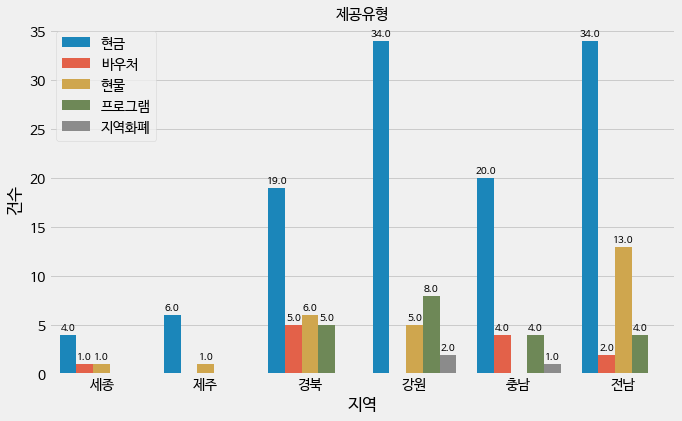

In [35]:
plt.style.use("fivethirtyeight")
plt.title('제공유형', fontsize=15)
ax = sns.countplot(data=df_over1, x='지역', hue='제공유형')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, height, ha='center', size=10)
plt.legend(loc='upper left')
plt.ylabel('건수')

plt.show()